# Xin chào tất cả các bạn

In [861]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [862]:
df = pd.read_csv("./24_04_2021_prepro2.csv")

In [863]:
# df = pd.read_csv("./24_04_2021_prepro1.csv")
# df = df.replace(',','', regex=True)
# attrs = list(df)
# df[attrs[2:-1]] = df[attrs[2:-1]].astype(np.float64)
# df = df.replace(np.nan, 0)
# df.to_csv('./24_04_2021_prepro2.csv')

In [865]:
# Tính hàm nội suy và R^2
def calLinearInterpolation(X, Y):
    w1 = (np.mean(X*Y) - np.mean(X)*np.mean(Y))/(np.mean(X*X) - np.mean(X)**2)
    w0 =  np.mean(Y) - w1*np.mean(X)
    RSS = 0.0
    TSS = 0.0
    meanY = np.mean(Y)
    for i in range(0, Y.size):
        RSS = RSS + (Y[0,i] - w1*X[0,i] - w0)**2
        TSS = TSS + (Y[0,i] - meanY)**2
    R2 = 1 - RSS/TSS
    return w1, w0, R2

# Vẽ hàm nội suy
def drawLinearInterpolation(ax, X, Y, xlabel, ylabel):
    w1, w0, R2 = calLinearInterpolation(X, Y)
    title = ylabel + '=' + "{:.6f}".format(w1)+ xlabel+' + '+ "{:.6f}".format(w0) + ', R^2=' + "{:.6f}".format(R2)
    ax.set_title(label=title, fontsize=20)
    Xp = np.linspace(np.min(X),np.max(X), 2)
    Yp = w1*Xp + w0
    ax.plot(Xp, Yp, 'red', linewidth=5)
    print(ylabel + '=' + "{:.6f}".format(w1)+ xlabel+' + '+ "{:.6f}".format(w0) + ', Độ tin cậy=' + "{:.6f}".format(R2*100)+"%")

# Vẽ hàm nội suy và đồ thị điểm
def drawLinearInterpolationAndScatter(ax, X, Y, xlabel, ylabel):
    ax.scatter(X, Y)
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    drawLinearInterpolation(ax, X, Y, xlabel, ylabel)
    

NewCases=0.005388TotalCases + 170.512596, Độ tin cậy=36.655141%
TotalDeaths=0.018421TotalCases + 1826.571225, Độ tin cậy=88.858088%
NewDeaths=0.000072TotalCases + 13.023174, Độ tin cậy=47.799032%
TotalRecovered=0.805144TotalCases + 30079.231588, Độ tin cậy=99.597703%
ActiveCases=0.176435TotalCases + -31905.802813, Độ tin cậy=91.559681%
TotalTests=12.732741TotalCases + 1131103.934837, Độ tin cậy=79.727140%
TotalDeaths=0.997754NewCases + 10336.513855, Độ tin cậy=20.646098%
NewDeaths=0.009392NewCases + 25.748253, Độ tin cậy=64.175827%
TotalRecovered=56.299173NewCases + 354380.434231, Độ tin cậy=38.567146%
ActiveCases=10.734857NewCases + 45177.507475, Độ tin cậy=26.843371%
TotalTests=947.130451NewCases + 6046355.200469, Độ tin cậy=34.937609%
NewDeaths=0.003705TotalDeaths + 8.836414, Độ tin cậy=48.162076%
TotalRecovered=39.111632TotalDeaths + 14982.600678, Độ tin cậy=89.749882%
ActiveCases=8.126294TotalDeaths + -28954.671126, Độ tin cậy=74.171675%
TotalTests=575.332789TotalDeaths + 1500609.

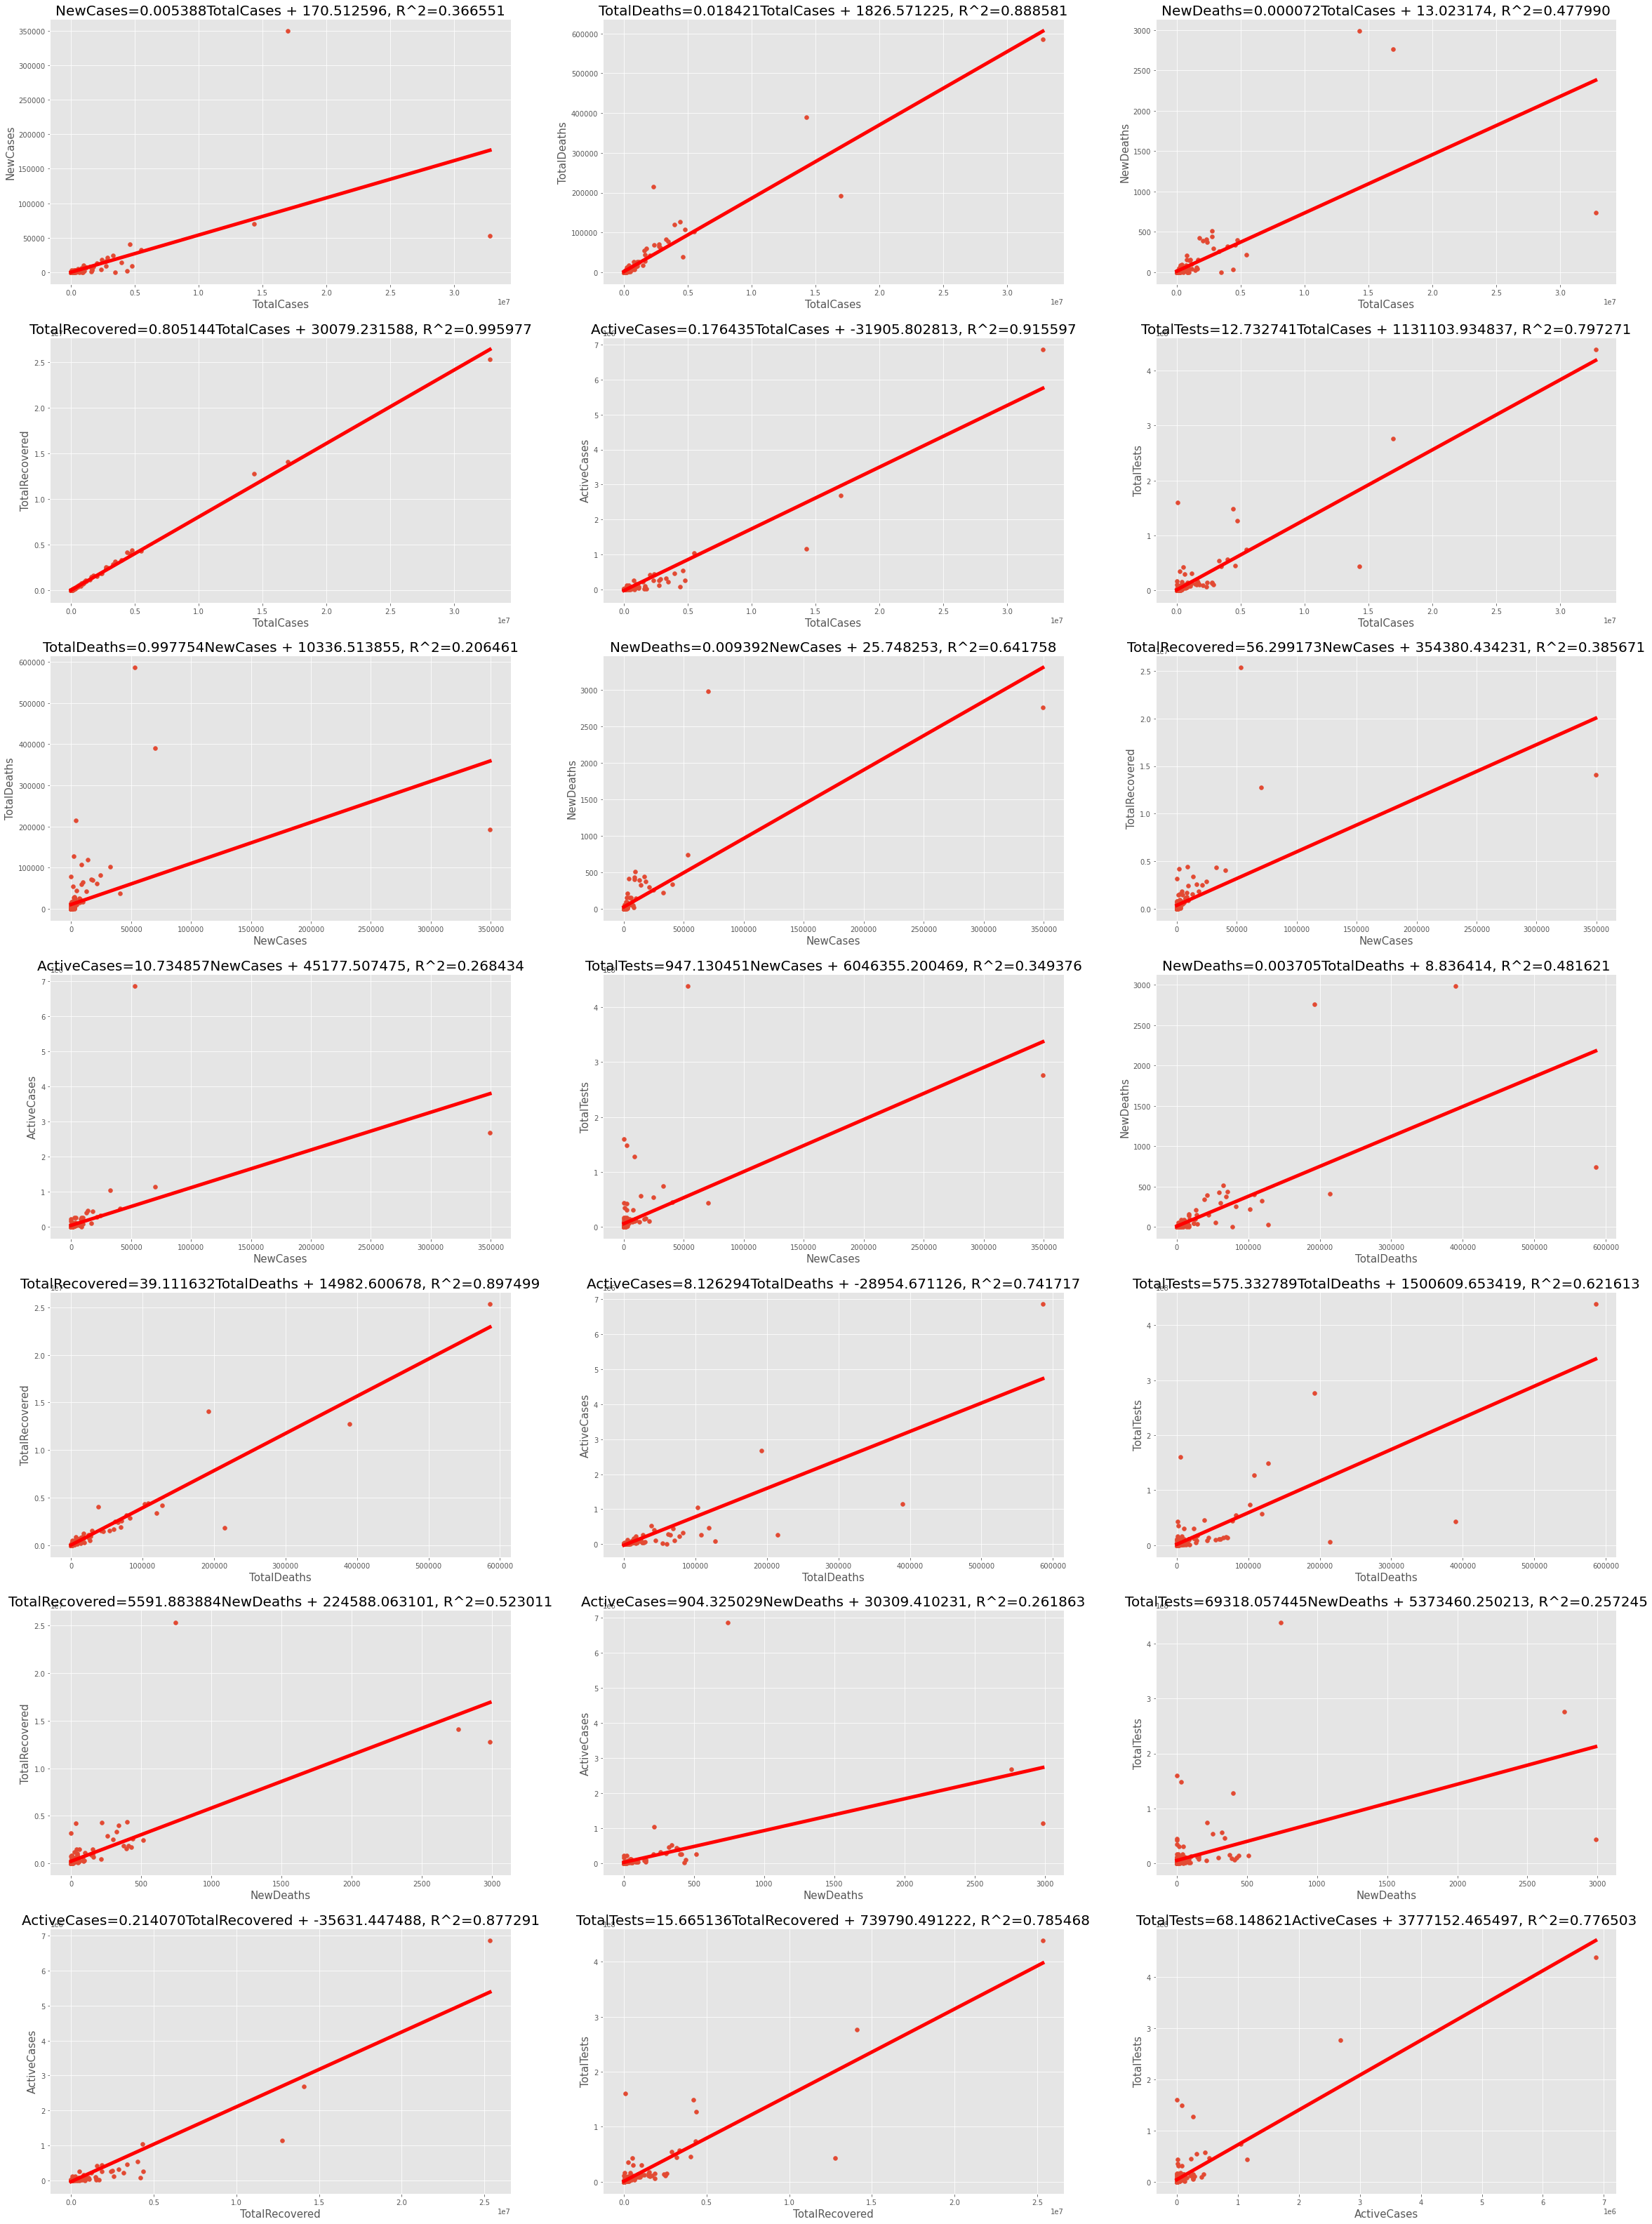

In [866]:
fig, ax = plt.subplots(7, 3, figsize=(40,57))

count = 0
headers = ['TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'ActiveCases', 'TotalTests']
for i in range(0, len(headers) - 1):
    X = np.array([df[headers[i]].values])
    for j in range(i + 1, len(headers)):
        Y = np.array([df[headers[j]].values])
        row = int(count / 3)
        col = int(count % 3)
        count = count + 1
        drawLinearInterpolationAndScatter(ax[row][col], X, Y, headers[i], headers[j]) 

fig.savefig('figure0.png')


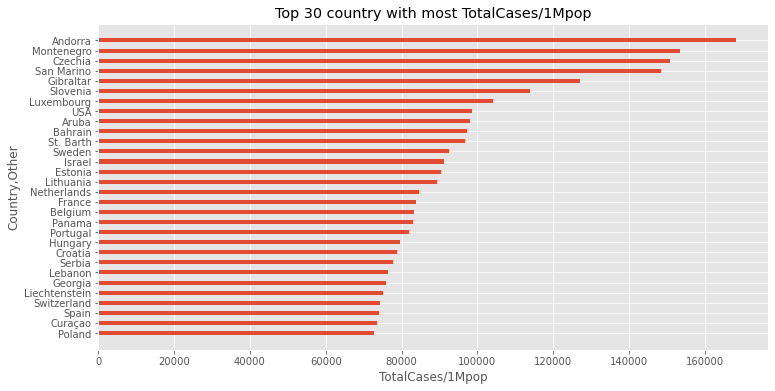

In [867]:
def drawBarChart(ax, X, Y, xlabel, ylabel, title):
    ind = np.arange(len(top30)) * 2
    ax.set_yticks(ind)
    ax.set_yticklabels(Y)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.barh(ind, X)

top30 = df.sort_values(by='TotalCases/1Mpop', ascending = False).head(30).sort_values(by='TotalCases/1Mpop', ascending = True)

# Tạo 1 đối tượng plot để vẽ
fig, ax = plt.subplots(figsize = (12, 6))

Y = top30['Country,Other']
X = top30['TotalCases/1Mpop']
drawBarChart(ax, X, Y, 'TotalCases/1Mpop','Country,Other', 'Top 30 country with most TotalCases/1Mpop')

fig.savefig('figure1.png')



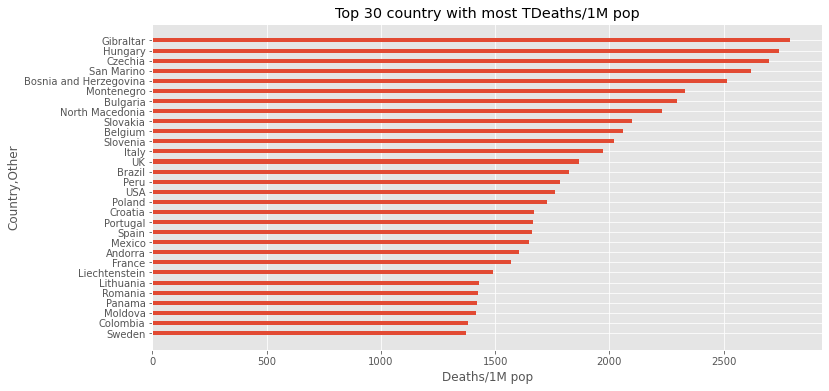

In [868]:
def drawBarChart(ax, X, Y, xlabel, ylabel, title):
    ind = np.arange(len(top30)) * 2
    ax.set_yticks(ind)
    ax.set_yticklabels(Y)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.barh(ind, X)

top30 = df.sort_values(by='Deaths/1M pop', ascending = False).head(30).sort_values(by='Deaths/1M pop', ascending = True)

# Tạo 1 đối tượng plot để vẽ
fig, ax = plt.subplots(figsize = (12, 6))

Y = top30['Country,Other']
X = top30['Deaths/1M pop']
drawBarChart(ax, X, Y, 'Deaths/1M pop','Country,Other', 'Top 30 country with most Deaths/1M pop')

fig.savefig('figure2.png')

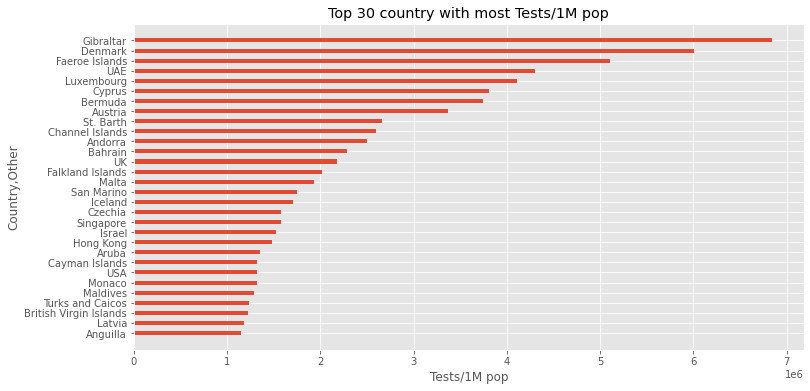

In [869]:
def drawBarChart(ax, X, Y, xlabel, ylabel, title):
    ind = np.arange(len(top30)) * 2
    ax.set_yticks(ind)
    ax.set_yticklabels(Y)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.barh(ind, X)

top30 = df.sort_values(by='Tests/1M pop', ascending = False).head(30).sort_values(by='Tests/1M pop', ascending = True)

# Tạo 1 đối tượng plot để vẽ
fig, ax = plt.subplots(figsize = (12, 6))

Y = top30['Country,Other']
X = top30['Tests/1M pop']
drawBarChart(ax, X, Y, 'Tests/1M pop','Country,Other', 'Top 30 country with most Tests/1M pop')

fig.savefig('figure3.png')

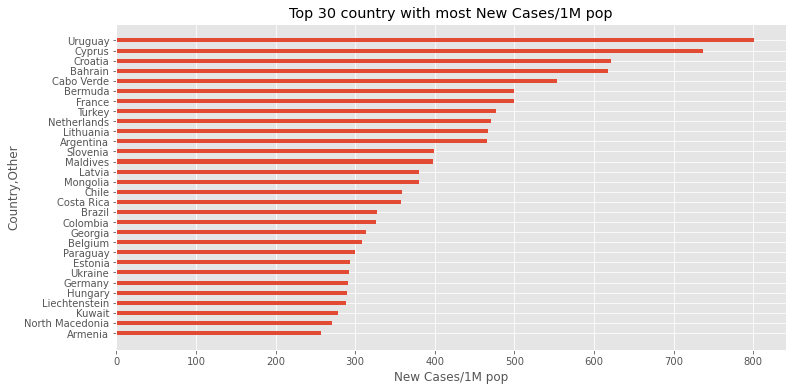

In [870]:
def drawBarChart(ax, X, Y, xlabel, ylabel, title):
    ind = np.arange(len(top30)) * 2
    ax.set_yticks(ind)
    ax.set_yticklabels(Y)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.barh(ind, X)

top30 = df.sort_values(by='New Cases/1M pop', ascending = False).head(30).sort_values(by='New Cases/1M pop', ascending = True)

# Tạo 1 đối tượng plot để vẽ
fig, ax = plt.subplots(figsize = (12, 6))

Y = top30['Country,Other']
X = top30['New Cases/1M pop']
drawBarChart(ax, X, Y, 'New Cases/1M pop','Country,Other', 'Top 30 country with most New Cases/1M pop')

fig.savefig('figure4.png')

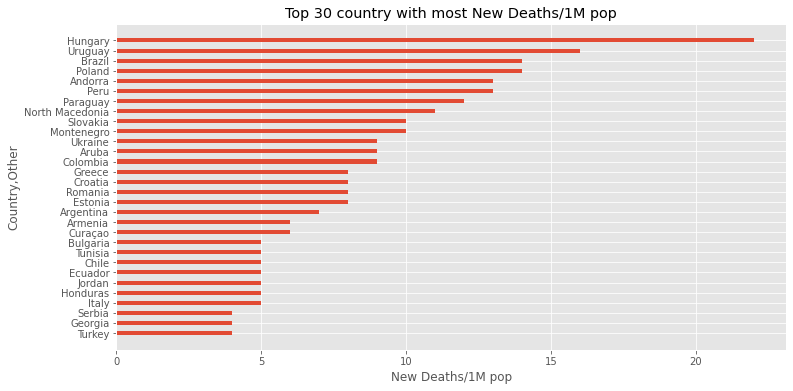

In [873]:
def drawBarChart(ax, X, Y, xlabel, ylabel, title):
    ind = np.arange(len(top30)) * 2
    ax.set_yticks(ind)
    ax.set_yticklabels(Y)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.barh(ind, X)

top30 = df.sort_values(by='New Deaths/1M pop', ascending = False).head(30).sort_values(by='New Deaths/1M pop', ascending = True)

# Tạo 1 đối tượng plot để vẽ
fig, ax = plt.subplots(figsize = (12, 6))

Y = top30['Country,Other']
X = top30['New Deaths/1M pop']
drawBarChart(ax, X, Y, 'New Deaths/1M pop','Country,Other', 'Top 30 country with most New Deaths/1M pop')

fig.savefig('figure5.png')

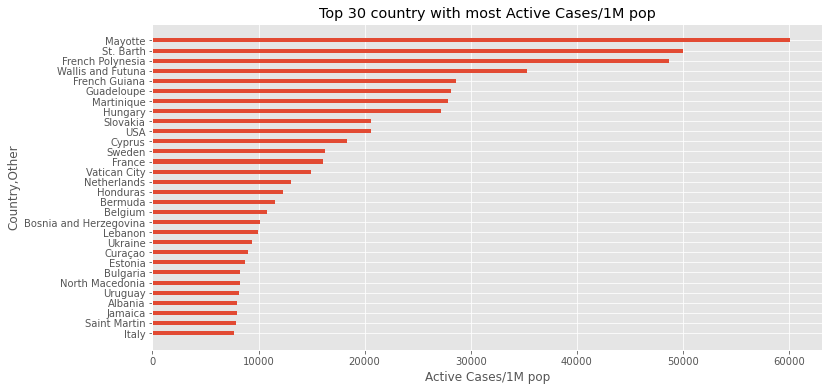

In [874]:
def drawBarChart(ax, X, Y, xlabel, ylabel, title):
    ind = np.arange(len(top30)) * 2
    ax.set_yticks(ind)
    ax.set_yticklabels(Y)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.barh(ind, X)

top30 = df.sort_values(by='Active Cases/1M pop', ascending = False).head(30).sort_values(by='Active Cases/1M pop', ascending = True)

# Tạo 1 đối tượng plot để vẽ
fig, ax = plt.subplots(figsize = (12, 6))

Y = top30['Country,Other']
X = top30['Active Cases/1M pop']
drawBarChart(ax, X, Y, 'Active Cases/1M pop','Country,Other', 'Top 30 country with most Active Cases/1M pop')

fig.savefig('figure6.png')

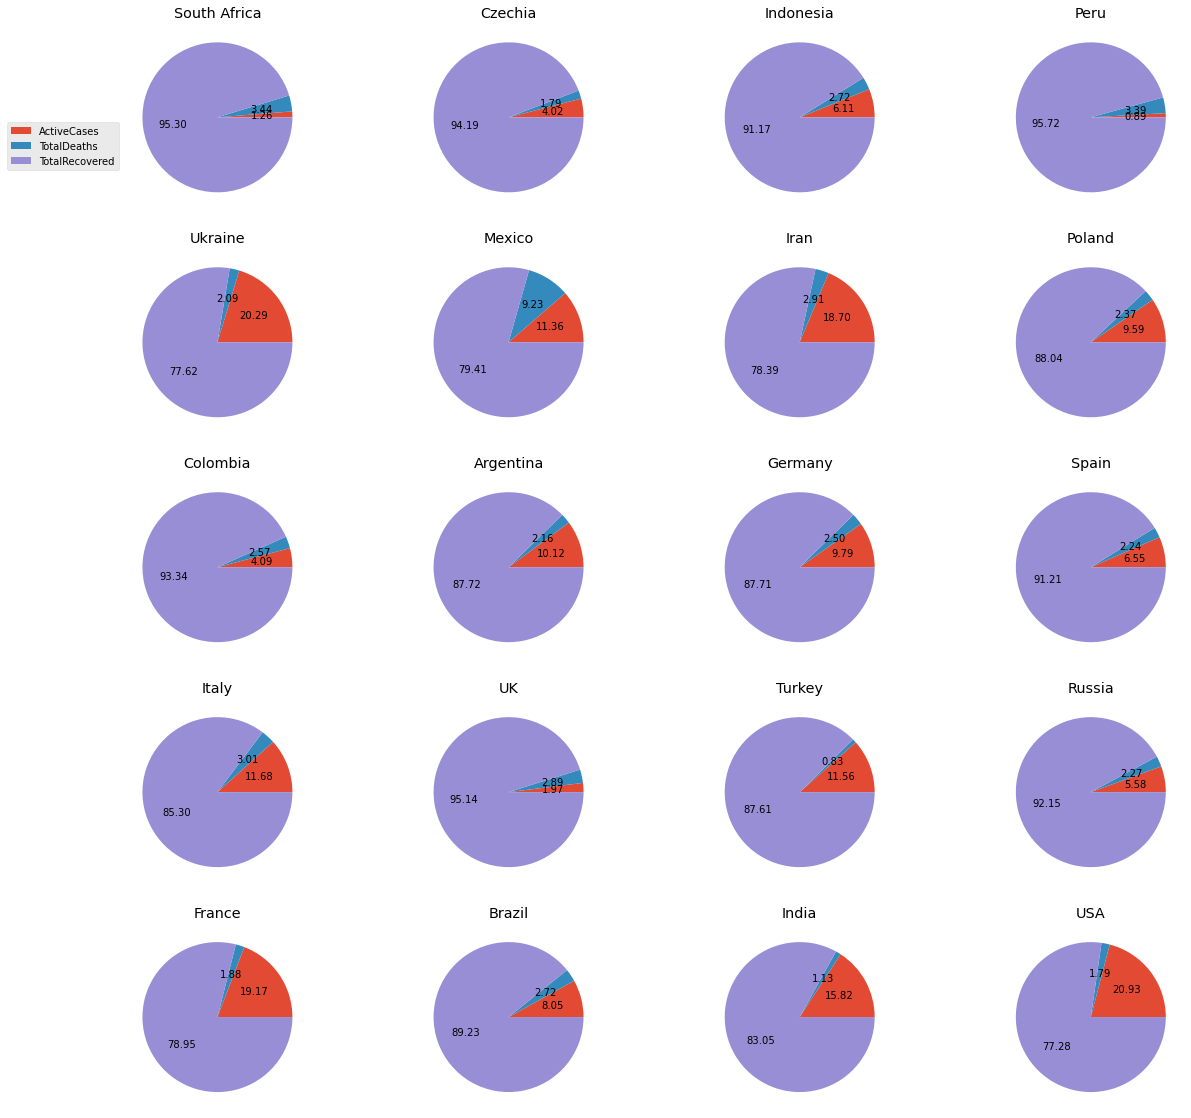

In [875]:
top20 = df.sort_values(by='TotalCases', ascending = False).head(20).sort_values(by='TotalCases', ascending = True)

X = top20['Country,Other']
activeCases = top20['ActiveCases']
totalDeaths = top20['TotalDeaths']
totalRecovered = top20['TotalRecovered']

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
for ax, country, a, b, c in zip(axes.flat, X, activeCases, totalDeaths, totalRecovered):
    ax.pie([a, b, c], autopct='%.2f')
    ax.set(ylabel='', title=country, aspect='equal')
axes[0, 0].legend( labels = ['ActiveCases','TotalDeaths','TotalRecovered'], bbox_to_anchor=(0, 0.5))
plt.show()

fig.savefig('figure7.png')

In [872]:
top20 = df.sort_values(by='TotalCases', ascending = False).head(20).sort_values(by='TotalCases', ascending = True)

Y = 

SyntaxError: invalid syntax (<ipython-input-872-ced50fd1c59c>, line 3)